## Pkg.clone("https://github.com/pjabardo/Jacobi.jl")
#Pkg.add("Formatting")
#Pkg.add("DataFrames")
using DataFrames
using Formatting
using PyPlot
using Jacobi

In [1]:
using Jacobi
using PyPlot 
using Formatting

  
error = 0.23225938060325235


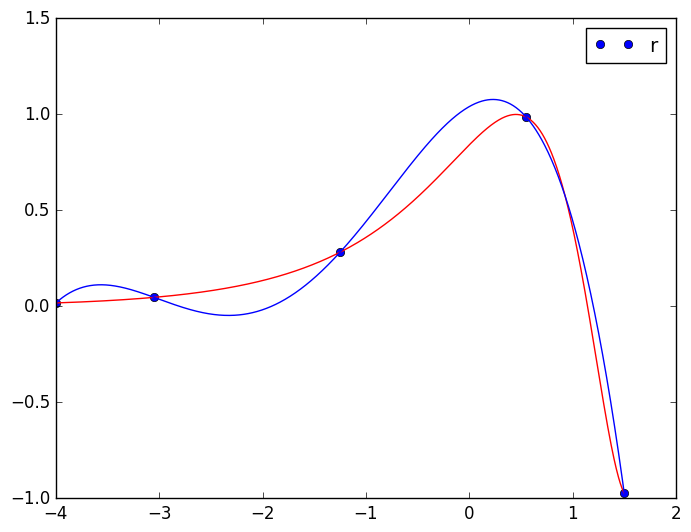

In [2]:
###############
# interpolação#
##############
#intervalo 
a = -4; b = 1.5

Q = 5
z = zglj(Q)
nx = 1000
x = linspace(-1, 1, nx)
#altera o intervalo de interpolação
z = ((1-z)/(2)).*a + ((1+z)/(2)).*b
x = ((1-x)/(2)).*a + ((1+x)/(2)).*b
#estabelece as funções
ye = sin(exp(z))
ye2 = sin(exp(x))
#interpola os pontos por polinômios de lagrange
Im = interp_mat(x, z)
y = Im * ye
plot(z, ye, "o",label = "zeros")
plot(x, ye2, "r-",label = "original")
plot(x, y, "b-",label = "aprox")
legend("r")
println("  ")
println("error = ", maxabs(y-ye2))

  
error = 7.562492422352284


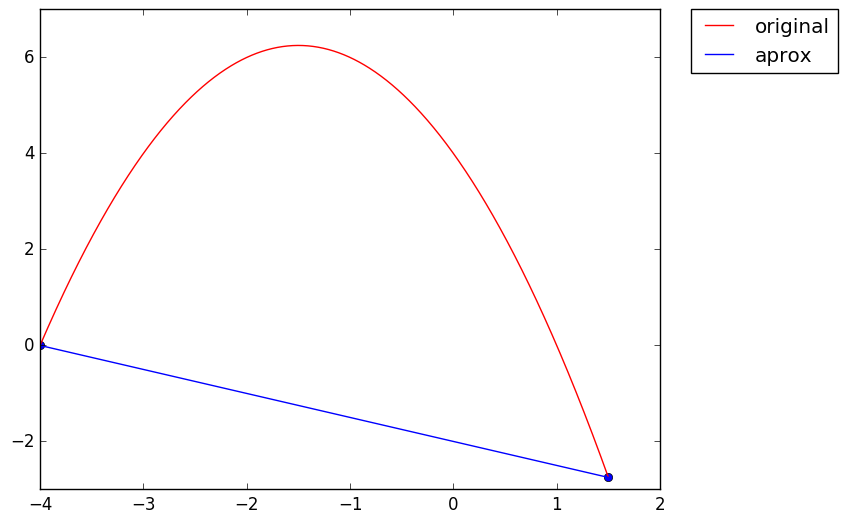

In [4]:
###############
# interpolação#
##############
#intervalo 
a = -4; b = 1.5
func(x) = -x.^2 - 3.*x + 4
Q = 2
z = zglj(Q)
nx = 1000
x = linspace(-1, 1, nx)
#altera o intervalo de interpolação
z =((1-z)/(2)).*a + ((1+z)/(2)).*b
x = ((1-x)/(2)).*a + ((1+x)/(2)).*b
#estabelece as funções
ye = func(z)
ye2 = func(x)
#interpola os pontos por polinômios de lagrange
Im = interp_mat(x, z)
y = Im * ye
plot(z, ye, "o" )
plot(x, ye2, "r-",label = "original")
plot(x, y, "b-",label = "aprox")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
println("  ")
println("error = ", maxabs(y-ye2))

23456

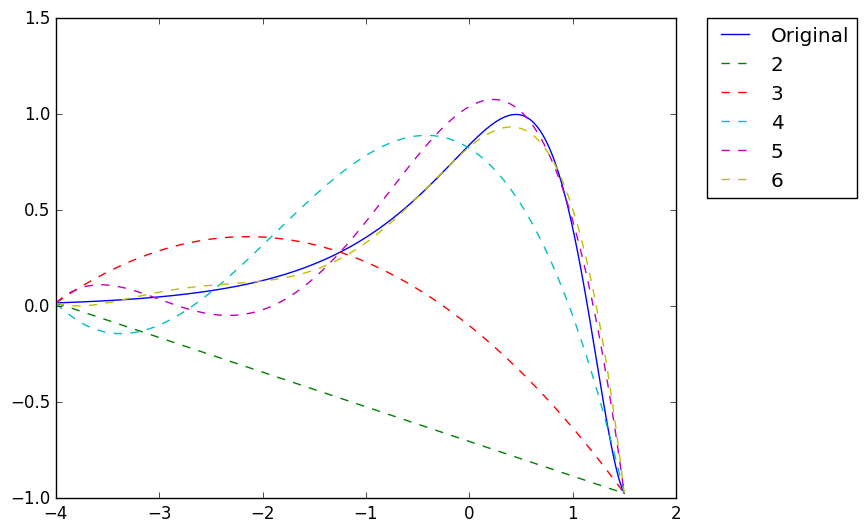

In [5]:
ye2 = sin(exp(x))
plot(x, ye2, "-",label="Original")
legend()
N = 6
for Q in 2:1:N
    print(Q)
    z = zglj(Q)
    nx = 1000
    x = linspace(-1, 1, nx)
    #altera o intervalo de interpolação
    z =((1-z)/(2)).*a + ((1+z)/(2)).*b
    x = ((1-x)/(2)).*a + ((1+x)/(2)).*b
    #estabelece as funções
    ye = sin(exp(z))
    #interpola os pontos por polinômios de lagrange
    Im = interp_mat(x, z)
    y = Im * ye

    plot(x, y, "--",label = "$Q")
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
end


## Fenômeno de Runge
Interpolação da função de runge:

# \begin{equation} f(x) = \frac{1}{1 + x^2} \end{equation}

erro para 10 = 2.0265801598696433


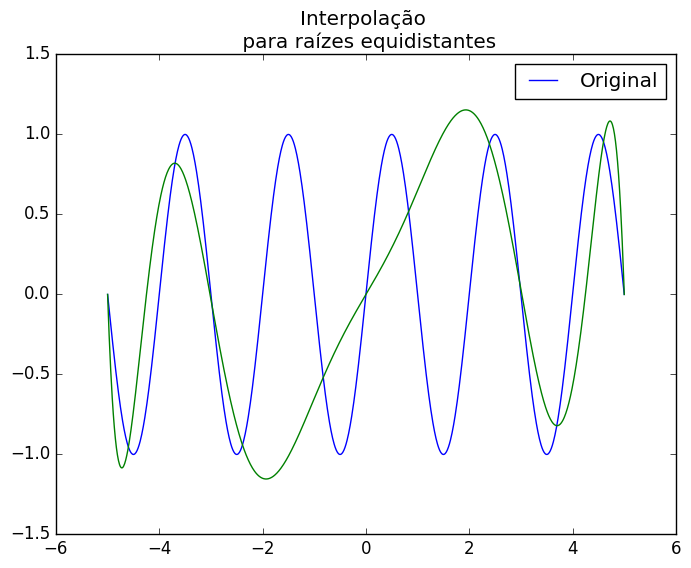

In [21]:

#intervalo 
a = -5 ; b = 5


#f(x) = 1./(1 + x.^2)
f(x) = sin(x*pi)
Q=  19
nx = 1000
x2 = linspace(a, b, nx)
ye2 = f(x2)
plot(x2, ye2, "-",label="Original")
title("Interpolação \n para raízes equidistantes")
legend()

l = 0.0

Q = 10

z = chebyshev_zeros(Q)
z = zglj(Q)
nx= 1000
x = linspace(a, b, nx)

#altera o intervalo de interpolação
z = ((1-z)/(2)).*a + ((1+z)/(2)).*b
#estabelece as funções
ye = f(z)
#interpola os pontos por polinômios de lagrange
Im = interp_mat(x, z)
y =  Im * ye
#aprox
plot(x,y)
erro = maxabs(y-ye2)
l = [l maxabs(y-ye2)]
println("erro para $Q = $erro") 


In [10]:
chebyshev_zeros(20)

20-element Array{Float64,1}:
 -0.996917 
 -0.97237  
 -0.92388  
 -0.85264  
 -0.760406 
 -0.649448 
 -0.522499 
 -0.382683 
 -0.233445 
 -0.0784591
  0.0784591
  0.233445 
  0.382683 
  0.522499 
  0.649448 
  0.760406 
  0.85264  
  0.92388  
  0.97237  
  0.996917 

  
erro para 15 = 0.04925147946628822
  
erro para 16 = 0.09127643941859342
  
erro para 17 = 0.03480051165143472
  
erro para 18 = 0.06138108005434528
  
erro para 19 = 0.02417071278040611
  
erro para 20 = 0.04125522442013596
  
erro para 21 = 0.016563351461061915
  
erro para 22 = 0.027722415179156967
  
erro para 23 = 0.01123529010664015
  
erro para 24 = 0.018627340237927892
  
erro para 25 = 0.00755946040360822
  
erro para 26 = 0.012515934423211306
  
erro para 27 = 0.0050539593800286164
  
erro para 28 = 0.00840965234350155
  
erro para 29 = 0.0033624553865592155
  
erro para 30 = 0.005650648542965597
  
erro para 31 = 0.002229237874117218
  
erro para 32 = 0.0037968595113593295
  
erro para 33 = 0.0015099747138278552
  
erro para 34 = 0.002551268829444897
  
erro para 35 = 0.0010253715591656554


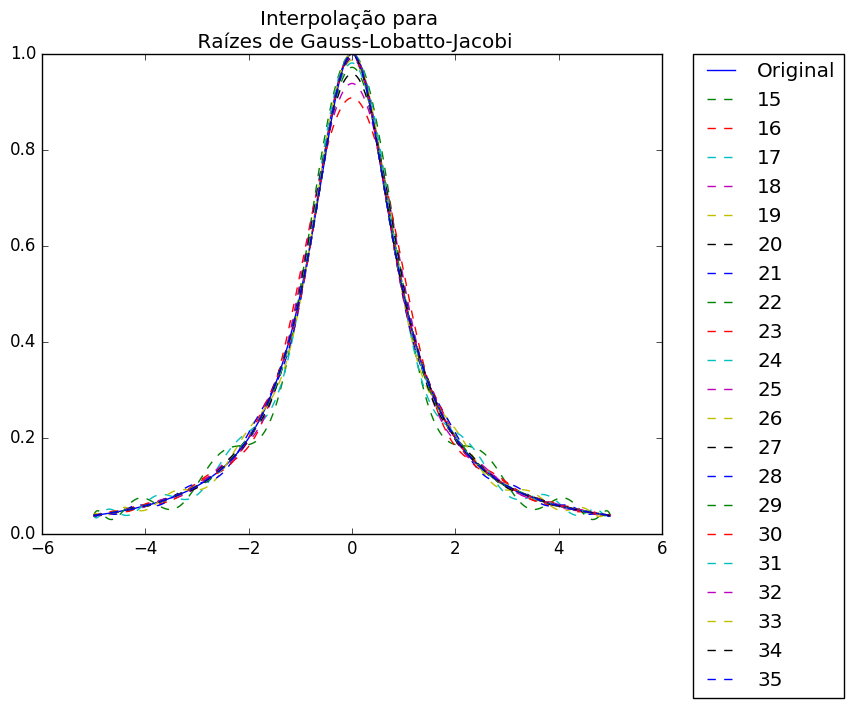

In [82]:

#intervalo 
a = -5 ; b = 5


f(x) = 1./(1 + x.^2)


nx = 1000
x2 = linspace(a, b, nx)
ye2 = f(x2)
plot(x2, ye2, "-",label="Original")
title("Interpolação para \n Raízes de Gauss-Lobatto-Jacobi")
legend()
N =35
errog = [0]
for Q in 15:1:N
    z = zglj(Q)
    nx= 1000
    x = linspace(a, b, nx)
    
    #altera o intervalo de interpolação
    z = ((1-z)/(2)).*a + ((1+z)/(2)).*b
    
    #estabelece as funções
    ye = f(z)
    
    #interpola os pontos por polinômios de lagrange
    Im = interp_mat(x, z)
    y =  Im * ye
    
    plot(x, y, "--",label = "$Q")
    
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    println("  ")
    erro = maxabs(y-ye2)
    errog = [errog maxabs(y-ye2)]
    println("erro para $Q = $erro")
end
 


  
erro para 15 = 0.04660097519479672
  
erro para 16 = 0.08309430748091273
  
erro para 17 = 0.03260902897896373
  
erro para 18 = 0.05589700277754728
  
erro para 19 = 0.022492164753664945
  
erro para 20 = 0.03758185458922003
  
erro para 21 = 0.015333384003373807
  
erro para 22 = 0.02526178588654937
  
erro para 23 = 0.010358901523548292
  
erro para 24 = 0.0169786052268196
  
erro para 25 = 0.006947268930884265
  
erro para 26 = 0.011410833923378938
  
erro para 27 = 0.004634418493389081
  
erro para 28 = 0.007668697384357714
  
erro para 29 = 0.003078214388764322
  
erro para 30 = 0.0051537081435114596
  
erro para 31 = 0.0020612652593430814
  
erro para 32 = 0.003463493504105686
  
erro para 33 = 0.0014017442593826646
  
erro para 34 = 0.002327589149394571
  
erro para 35 = 0.0009487948764948517


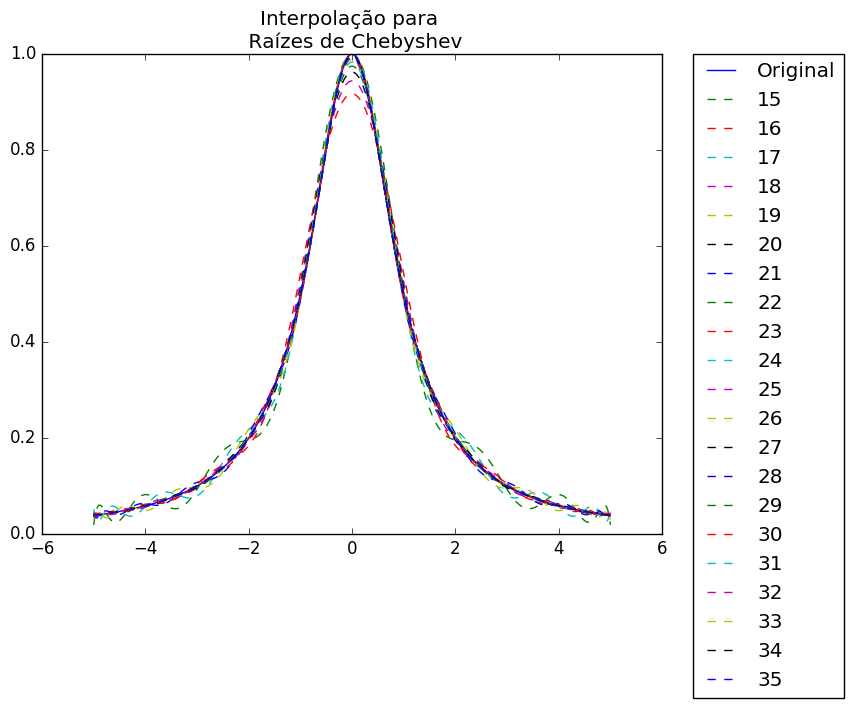

In [83]:

#intervalo 
a = -5 ; b = 5


f(x) = 1./(1 + x.^2)


nx = 1000
x2 = linspace(a, b, nx)
ye2 = f(x2)
plot(x2, ye2, "-",label="Original")
title("Interpolação para \n Raízes de Chebyshev")
legend()
N =35
erroc = [0]
for Q in 15:1:N
    z = Jacobi.chebyshev_zeros(Q)
    nx= 1000
    x = linspace(a, b, nx)
    
    #altera o intervalo de interpolação
    z = ((1-z)/(2)).*a + ((1+z)/(2)).*b
    
    #estabelece as funções
    ye = f(z)
    
    #interpola os pontos por polinômios de lagrange
    Im = interp_mat(x, z)
    y =  Im * ye
    
    plot(x, y, "--",label = "$Q")
    
    legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    println("  ")
    erro = maxabs(y-ye2)
    erroc = [erroc maxabs(y-ye2)]
    println("erro para $Q = $erro")
end
 


 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 in vect at abstractarray.jl:32
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/augusto/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /home/augusto/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[14], in expression starting on line 1
/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axis.py:1015: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axis.py:1025: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


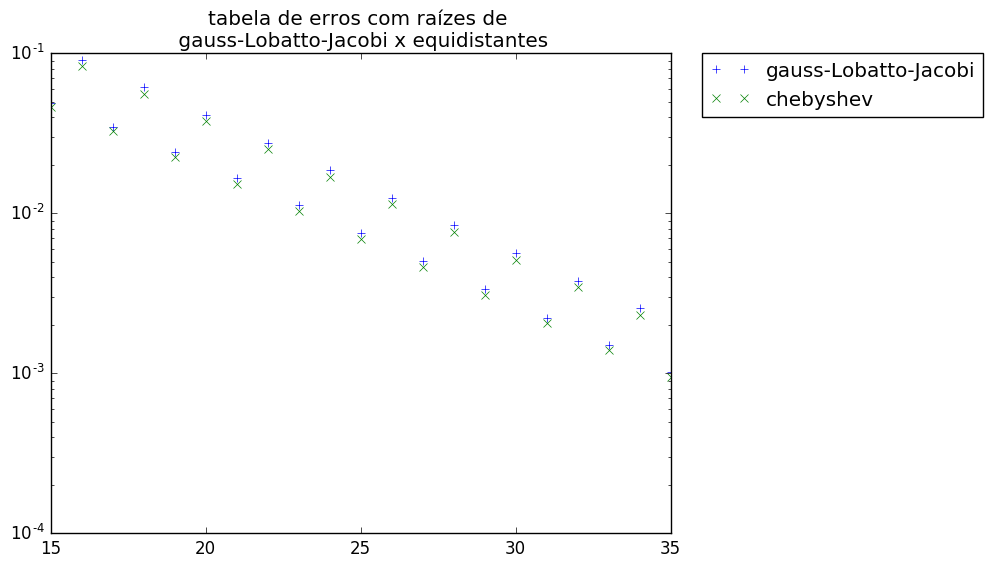

PyObject <matplotlib.text.Text object at 0x7f2731859b50>

In [14]:
t = collect([15:1:35])
semilogy(t,errog[2:end],"+",label="gauss-Lobatto-Jacobi")
semilogy(t,erroc[2:end],"x",label = "chebyshev")
#semilogy(t, l[2:end] ,"o",label= "equidistantes")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title("tabela de erros com raízes de \n gauss-Lobatto-Jacobi x equidistantes")

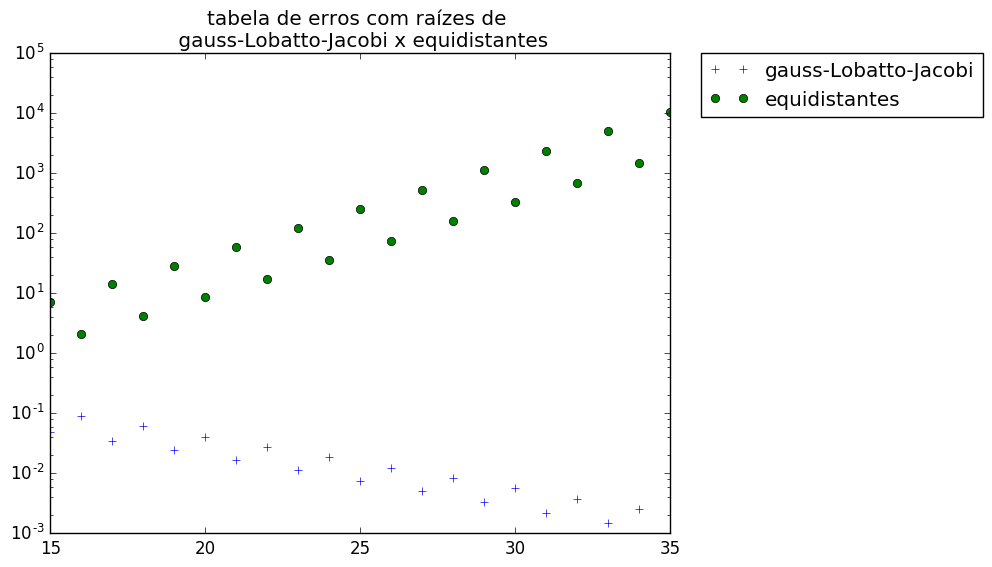

PyObject <matplotlib.text.Text object at 0x7f273271ca10>

In [16]:
semilogy(t,errog[2:end],"+",label="gauss-Lobatto-Jacobi")
#semilogy(t,erroc[2:end],"x",label = "chebyshev")
semilogy(t, l[2:end] ,"o",label= "equidistantes")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title("tabela de erros com raízes de \n gauss-Lobatto-Jacobi x equidistantes")

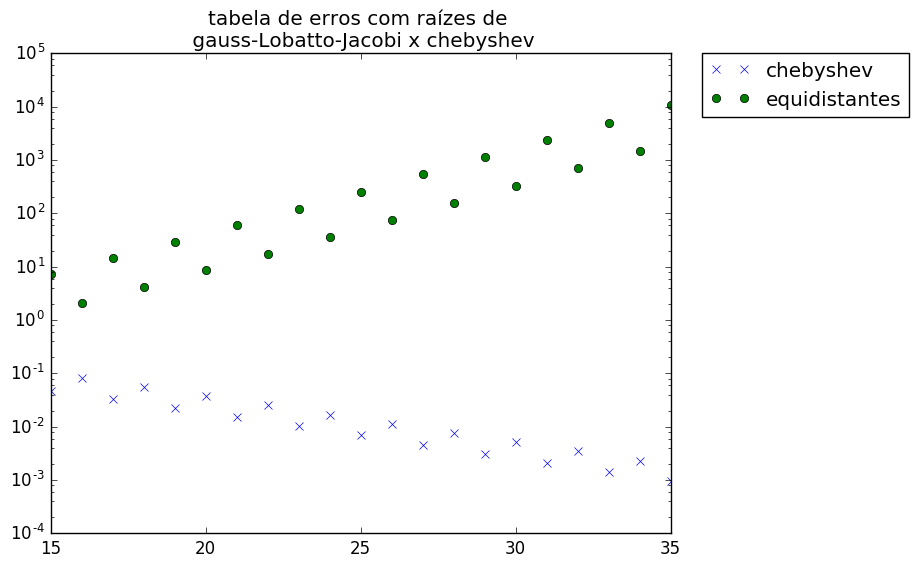

PyObject <matplotlib.text.Text object at 0x7f27320e1550>

In [17]:
semilogy(t,erroc[2:end],"x",label = "chebyshev")
semilogy(t, l[2:end] ,"o",label= "equidistantes")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title("tabela de erros com raízes de \n gauss-Lobatto-Jacobi x chebyshev")

In [55]:
df = DataFrame()
df[:Grau] = t
df[:glj]  = errog[2:end]
df[:equidist]  = l[2:end]
df[:cheb ]  = erroc[2:end]
df
writetable("df.csv",df,separator = ',',header=true)

In [77]:
fmt = "%10.3e"
errog1 = [sprintf1( fmt, erro ) for erro in errog]
erroc1 = [sprintf1( fmt, erro ) for erro in erroc]
erroe1 = [sprintf1( fmt, erro ) for erro in l]
l1 = [sprintf1( "%10.2f", erro ) for erro in l]
df2 = DataFrame()
df2[:Grau] = t
df2[:equidist]  = l1[2:end]
df2[:glj]  = errog1[2:end]
df2[:cheb ]  = erroc1[2:end]
df2
writetable("df2.csv",df2,separator = ',',header=true)
df2

,Grau,equidist,glj,cheb
1,15,7.19,4.925e-02,4.660e-02
2,16,2.11,9.128e-02,8.309e-02
3,17,14.39,3.480e-02,3.261e-02
4,18,4.22,6.138e-02,5.590e-02
5,19,29.19,2.417e-02,2.249e-02
6,20,8.58,4.126e-02,3.758e-02
7,21,59.77,1.656e-02,1.533e-02
8,22,17.60,2.772e-02,2.526e-02
9,23,123.62,1.124e-02,1.036e-02
10,24,36.40,1.863e-02,1.698e-02


In [33]:
DataFrame(Grau = t, glj = errog, equidist = l, cheb = erroc)

LoadError: LoadError: ArgumentError: setindex!(::DataFrame, ...) only broadcasts scalars, not arrays
while loading In[33], in expression starting on line 1

# Integração


Para $\xi \in [-1,1]$ podemos fazer a interpolação:

$\int_{-1}^{1} f(\xi )d\xi = \sum_{i=1}^{N} f(\xi)w_{i}(\xi)$

Para integrar a função no intervalo [a,b], fazemos $ x = \frac{1-\xi}{2}a + \frac{1+\xi}{2} b $

$\int_{-1}^{1} f(\xi )d\xi = \frac{b-a}{2}  \int_{a}^{b} f(x)dx = \frac{b-a}{2} \sum_{i=1}^{N} w_i f(\frac{1-\xi}{2}a + \frac{1+\xi}{2} b))$




In [13]:
#integração
fun(x) = x.^2 - 2.*x +3
#intervalo [a,b]
a = -10; b = -3
z = zglj(Q, .0, 0.0)
w = wglj(z, 0.0, 0.0)
#transformação da z do intervalo [-1,1] para [a,b]
z =((1-z)/(2)).*a + ((1+z)/(2)).*b
f2 = fun(z)
Ix = (b-a)/2 .*sum(w .* f2)



436.33333333333337